In [1]:
# Initial modules
import numpy as np
import pandas as pd
import sklearn
np.random.seed(404)
import math

from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import f_classif
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import Pipeline

In [2]:
#load data

traindata= pd.read_csv('train_imperson_without4n7_balanced_data.csv')
testdata= pd.read_csv('test_imperson_without4n7_balanced_data.csv')

In [3]:
# Separate X and Y

X_train, Y_train = traindata.loc[:, traindata.columns != '155'], traindata['155']

X_test, Y_test = testdata.loc[:, testdata.columns != '155'], testdata['155']

In [4]:
#Pipeline 1

pipeline1 = Pipeline([
('zero variance', VarianceThreshold()),
('top20 features', SelectKBest(f_classif, 29)),
('ada',AdaBoostClassifier(n_estimators=250,learning_rate=0.1))])

pipeline1.fit(X_train,Y_train)

Y_predict1=pipeline1.predict(X_test)

accuracy_score(Y_test, Y_predict1)*100

99.30773444892674

In [5]:
#Pipleline 1 - Classification Report

report = classification_report(Y_test, Y_predict1)
print(report)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20079
           1       0.99      0.99      0.99     20079

   micro avg       0.99      0.99      0.99     40158
   macro avg       0.99      0.99      0.99     40158
weighted avg       0.99      0.99      0.99     40158



In [6]:
#Pipeline 1 - Confusion Matrix

matrix = confusion_matrix(Y_test, Y_predict1)
print(matrix)

p1_TP = matrix[0][0]
p1_TN = matrix[1][1]
p1_FP = matrix[1][0]
p1_FN = matrix[0][1]

print('')

print('True Positive = %.0f' % p1_TP)
print('True Negative = %.0f' % p1_TN)

print('')

print('False Positive = %.0f' % p1_FP)
print('False Negative = %.0f' % p1_FN)

print('')

p1_Acc = (p1_TP + p1_TN) / (p1_TP + p1_TN + p1_FP + p1_FN)
print('Acc = %.4f' % p1_Acc)

p1_DR = p1_TP / (p1_TP + p1_FN)
print('DR(recall) = %.4f' % p1_DR)

p1_Prec = p1_TP / (p1_TP + p1_FP)
print('Precision = %.4f' % p1_Prec)

p1_FAR = p1_FP / (p1_TN + p1_FP)
print('FAR = %.4f' % p1_FAR)


p1_FNR = p1_FN / (p1_FN + p1_TP)
print('FNR = %.4f' % p1_FNR)

p1_F1 = (2 * p1_TP) / (2*p1_TP + p1_FP + p1_FN)
print('F1 = %.4f' % p1_F1)

p1_MCC = ((p1_TP * p1_TN) - (p1_FP * p1_FN)) / math.sqrt((p1_TP + p1_FP)*(p1_TP + p1_FN)*(p1_TN + p1_FP)*(p1_TN + p1_FN))
print('MCC = %.4f' % p1_MCC)

[[19923   156]
 [  122 19957]]

True Positive = 19923
True Negative = 19957

False Positive = 122
False Negative = 156

Acc = 0.9931
DR(recall) = 0.9922
Precision = 0.9939
FAR = 0.0061
FNR = 0.0078
F1 = 0.9931
MCC = 0.9862


AUC: 0.993


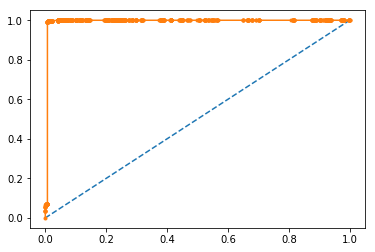

In [7]:
#Pipeline 1 - ROC Curve

probs = pipeline1.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(Y_test, probs)

pyplot.plot([0,1],[0,1], linestyle = '--')

pyplot.plot(fpr,tpr,marker='.')

pyplot.show()

In [8]:
#Pipeline 2

pipeline2= Pipeline([
('zero variance', VarianceThreshold()),
('scale 0_1', MinMaxScaler()),
('top20 features', SelectKBest(chi2, 29)),
('model',LogisticRegression(C=1007,solver='newton-cg'))])



pipeline2.fit(X_train,Y_train)

Y_predict2=pipeline2.predict(X_test)
accuracy_score(Y_test, Y_predict2)*100


98.91677872404004

In [9]:
#Pipleline 2 - Classification Report

report = classification_report(Y_test, Y_predict2)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20079
           1       0.99      0.99      0.99     20079

   micro avg       0.99      0.99      0.99     40158
   macro avg       0.99      0.99      0.99     40158
weighted avg       0.99      0.99      0.99     40158



In [10]:
#Pipeline 2 - Confusion Matrix

matrix = confusion_matrix(Y_test, Y_predict2)
print(matrix)

p2_TP = matrix[0][0]
p2_TN = matrix[1][1]
p2_FP = matrix[1][0]
p2_FN = matrix[0][1]

print('')

print('True Positive = %.0f' % p2_TP)
print('True Negative = %.0f' % p2_TN)

print('')

print('False Positive = %.0f' % p2_FP)
print('False Negative = %.0f' % p2_FN)

print('')

p2_Acc = (p2_TP + p2_TN) / (p2_TP + p2_TN + p2_FP + p2_FN)
print('Acc = %.4f' % p2_Acc)

p2_DR = p2_TP / (p2_TP + p2_FN)
print('DR(recall) = %.4f' % p2_DR)

p2_Prec = p2_TP / (p2_TP + p2_FP)
print('Precision = %.4f' % p2_Prec)

p2_FAR = p2_FP / (p2_TN + p2_FP)
print('FAR = %.4f' % p2_FAR)


p2_FNR = p2_FN / (p2_FN + p2_TP)
print('FNR = %.4f' % p2_FNR)

p2_F1 = (2 * p2_TP) / (2*p2_TP + p2_FP + p2_FN)
print('F1 = %.4f' % p2_F1)

p2_MCC = ((p2_TP * p2_TN) - (p2_FP * p2_FN)) / math.sqrt((p2_TP + p2_FP)*(p2_TP + p2_FN)*(p2_TN + p2_FP)*(p2_TN + p2_FN))
print('MCC = %.4f' % p2_MCC)


[[19786   293]
 [  142 19937]]

True Positive = 19786
True Negative = 19937

False Positive = 142
False Negative = 293

Acc = 0.9892
DR(recall) = 0.9854
Precision = 0.9929
FAR = 0.0071
FNR = 0.0146
F1 = 0.9891
MCC = 0.9784


AUC: 0.995


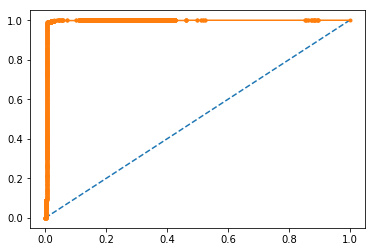

In [11]:
#Pipeline 2 - ROC Curve

probs = pipeline2.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(Y_test, probs)

pyplot.plot([0,1],[0,1], linestyle = '--')

pyplot.plot(fpr,tpr,marker='.')

pyplot.show()

In [12]:
pipeline3 = Pipeline([
    ('zero variance', VarianceThreshold()),
    ('scale 0_1', MinMaxScaler()),
    ('top20 features', SelectKBest(f_classif, k=30)),
    ('ada',AdaBoostClassifier(n_estimators=150,learning_rate=0.1))])

pipeline3.fit(X_train,Y_train)

Y_predict3=pipeline3.predict(X_test)
accuracy_score(Y_test, Y_predict3)*100

98.91677872404004

In [13]:
#Pipleline 3 - Classification Report

report = classification_report(Y_test, Y_predict3)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     20079
           1       0.98      0.99      0.99     20079

   micro avg       0.99      0.99      0.99     40158
   macro avg       0.99      0.99      0.99     40158
weighted avg       0.99      0.99      0.99     40158



In [14]:
#Pipeline 3 - Confusion Matrix

matrix = confusion_matrix(Y_test, Y_predict3)
print(matrix)

p3_TP = matrix[0][0]
p3_TN = matrix[1][1]
p3_FP = matrix[1][0]
p3_FN = matrix[0][1]

print('')

print('True Positive = %.0f' % p3_TP)
print('True Negative = %.0f' % p3_TN)

print('')

print('False Positive = %.0f' % p3_FP)
print('False Negative = %.0f' % p3_FN)

print('')

p3_Acc = (p3_TP + p3_TN) / (p3_TP + p3_TN + p3_FP + p3_FN)
print('Acc = %.4f' % p3_Acc)

p3_DR = p3_TP / (p3_TP + p3_FN)
print('DR(recall) = %.4f' % p3_DR)

p3_Prec = p3_TP / (p3_TP + p3_FP)
print('Precision = %.4f' % p3_Prec)

p3_FAR = p3_FP / (p3_TN + p3_FP)
print('FAR = %.4f' % p3_FAR)


p3_FNR = p3_FN / (p3_FN + p3_TP)
print('FNR = %.4f' % p3_FNR)

p3_F1 = (2 * p3_TP) / (2*p3_TP + p3_FP + p3_FN)
print('F1 = %.4f' % p3_F1)

p3_MCC = ((p3_TP * p3_TN) - (p3_FP * p3_FN)) / math.sqrt((p3_TP + p3_FP)*(p3_TP + p3_FN)*(p3_TN + p3_FP)*(p3_TN + p3_FN))
print('MCC = %.4f' % p3_MCC)

[[19766   313]
 [  122 19957]]

True Positive = 19766
True Negative = 19957

False Positive = 122
False Negative = 313

Acc = 0.9892
DR(recall) = 0.9844
Precision = 0.9939
FAR = 0.0061
FNR = 0.0156
F1 = 0.9891
MCC = 0.9784


AUC: 0.994


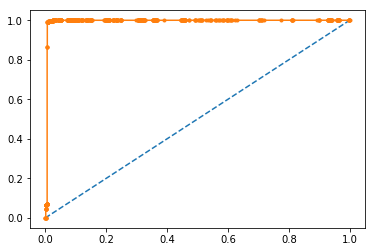

In [15]:
#Pipeline 3 - ROC Curve

probs = pipeline3.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(Y_test, probs)

pyplot.plot([0,1],[0,1], linestyle = '--')

pyplot.plot(fpr,tpr,marker='.')

pyplot.show()